In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sy
from scipy.stats import kurtosis as ks
from scipy.stats import skew as sw
from scipy.stats import chisquare
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.stats import sem
from statsmodels.stats.weightstats import ztest
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [37]:
df = pd.read_csv('human_body_temperature.csv')

In [38]:
# df.count()
# count of 130
df.head()
# 2. Is the sample size large? Are the observations independent?

# the random variable temperature is dependent on itself, 
# since we check independence between two or more random variables and not with itself,  
# if we're checking independence between observations here, there's 
# no way of knowing whether the same individual was observed more than once
# unless it were apparent there were duplicates across columns for many rows, 
# we're only dealing with the temperature column  

# a larger sample size will generally give you a better estimate of the 
# true population parameter up to a certain point
# since we only have one small sample, it is difficult to say whether or not
# the sample is indicative of the population parameter
# sample that is too small can lead to poor precision and confidence 
# in approximating the true population parameter
# it has been said that a sample size of 30 is sufficient for normally distributed data

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [39]:
# sy.chisquare(df.temperature,df.heart_rate)
# 2. 
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

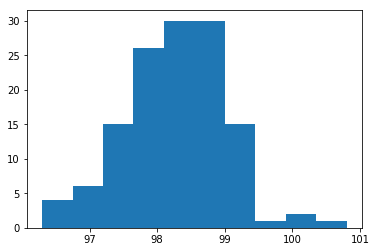

In [40]:
plt.hist(df.temperature)
# 1. is the distribution normal? probably but the shapiro and anderson tests 
# tell us not to reject the null hypothesis for n 0f 130 observations  
# REMEMBER: sy.normaltest(), allows for management of missing data

In [41]:
temper = df['temperature']
heart = df['heart_rate']
sy.pearsonr(temper,heart)
# most likely, the numeric columns are independent ands if they are 
# then so is the categorical column 
# p value says to reject null and that there is a low correlation of .25

(0.2536564027207642, 0.003591489250708233)

In [133]:
(temper < 98.6).value_counts()
# 81/130 = .623077

True     81
False    49
Name: temperature, dtype: int64

In [130]:
temper.count()

130

In [42]:
sy.spearmanr(temper,heart)
# spearman says the same as pearson

SpearmanrResult(correlation=0.2809189896902398, pvalue=0.0012058853002699706)

In [43]:
sy.chisquare(temper,heart)

Power_divergenceResult(statistic=1212.6534787818964, pvalue=1.682647940164671e-175)

In [44]:
table = pd.crosstab(temper,heart)
chi2,p,dof,expected = chi2_contingency(table.values)
print(chi2,p)
# p value > .05 tells us that columns are independent
# STOP number two 

909.4347952312239 0.967631309911425


In [45]:
sy.skew(df.temperature)
# as the histogram indicates, skew is close to 0
# this aspect is normal

-0.004367976879081625

In [46]:
sy.kurtosis(df.temperature)
# as the histogram indicates, there is kurtosis
# kurtosis of a normal distribution is generally 0 

0.7049597854114693

In [47]:
sy.jarque_bera(df.temperature)
# jb_value is not close to 0, so it is not normal according to the test stat
# p value is > .05, the traditional threshold for rejecting the null hypothesis
# we do not reject the null hypothesis that the distribution is normal
# the values are in conflict

(2.6923250029836856, 0.2602370060406519)

In [48]:
sy.kstest(df.temperature,'norm')
# stat says the null is true, and the distrubution is normal 
# p value tells us to reject the null hypothesis

KstestResult(statistic=1.0, pvalue=0.0)

In [49]:
sy.shapiro(df.temperature)
# do not reject the null

(0.9865769743919373, 0.2331680953502655)

In [50]:
sy.anderson(df.temperature,'norm')
# do not reject the null 

AndersonResult(statistic=0.5201038826714353, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [51]:
sy.normaltest(temper)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [52]:
# //// //// //// ////

In [53]:
# //// //// //// ////

In [54]:
# 3. Is the true population mean really 98.6 degrees F? 
# First, try a bootstrap hypothesis test.
# ****Now, let's try frequentist statistical testing. Would you use a 
# one-sample or two-sample test? Why? 

# ****In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
# Now try using the other test. How is the result different? Why?

In [55]:
# ANSWER: we only have one temperature column so we do a one sample t test. 

CORRECTION Bootstrap Beginning 

In [175]:
# bootstrap ***REVISED***

mean_ls, simuls = [], 1000
for s in range(simuls):
    tmp_samp = np.random.choice(temper, replace=True, size=len(temper))
    samp_mean = tmp_samp.mean()
    mean_ls.append(samp_mean)

In [176]:
tmp_samp
# last tmp sample

array([ 98.8,  98.5,  98.4,  98. , 100. ,  97.3,  98.1,  97.5,  96.7,
        98. ,  97.4,  98. ,  97.2,  98.6,  99.9,  97.4,  98.8,  97.8,
        97.5,  98.1,  98.7,  98.1,  98.4,  97.8,  96.3,  96.7,  98.2,
        97.2,  98. ,  97.4,  97.9,  97.1,  98.2,  98.4,  98.6,  98.7,
        98.4,  98.2,  98.1,  98.7,  98.7,  98.9,  97.1,  98. ,  97.6,
        98.8,  98.6,  99. ,  98.8,  98. ,  97.8,  97.8,  98.8,  98.4,
        98.2,  98.8,  96.3,  99.2,  98.6,  98.6,  99.5,  98. ,  98.7,
        99.1,  98.6,  97.8,  98.3,  98.2,  96.8,  98.2,  98.7,  97.1,
        97.5,  98.2,  98.8,  98.8,  97.8,  97.8,  98.7,  98. ,  98.4,
        98.6,  98.3,  99.1,  97.1,  97.2,  98.6,  98. ,  97.6,  98.4,
        97.4,  97.4,  96.8,  97.6,  98.5,  98. ,  97.1,  97.4,  99. ,
        97.2,  98.9,  98.6,  96.8,  97.7,  99.5,  98.3,  98.9,  98. ,
        98. ,  98.6,  97.4,  98.2,  98.8,  98.7,  96.4,  98.8,  97.6,
        98.6,  98.6,  99. ,  98.5,  99.3,  99.3,  97. ,  98.4,  97.8,
        98.8,  98.2,

In [177]:
samp_mean
# last samp mean

98.13923076923076

In [187]:
less = [1 for i in mean_ls if i < 98.6]

In [188]:
more = [i for i in mean_ls if i > 98.6]
more

[]

In [189]:
mean_ls
# the means will always turn out to be < 98.6

[98.19615384615386,
 98.31461538461537,
 98.29230769230769,
 98.29846153846154,
 98.30999999999999,
 98.23384615384613,
 98.23461538461538,
 98.25307692307693,
 98.24615384615385,
 98.2646153846154,
 98.18769230769232,
 98.1646153846154,
 98.19692307692308,
 98.28692307692307,
 98.25,
 98.25846153846155,
 98.28307692307695,
 98.25769230769231,
 98.21153846153847,
 98.25076923076924,
 98.29538461538462,
 98.31923076923077,
 98.30615384615385,
 98.17230769230768,
 98.34,
 98.30461538461537,
 98.2953846153846,
 98.25384615384615,
 98.23307692307692,
 98.42769230769231,
 98.2969230769231,
 98.24846153846153,
 98.33461538461539,
 98.21615384615386,
 98.24153846153845,
 98.26461538461538,
 98.22153846153846,
 98.23923076923077,
 98.24538461538462,
 98.2776923076923,
 98.2176923076923,
 98.24307692307691,
 98.20076923076924,
 98.31230769230768,
 98.19384615384615,
 98.27538461538464,
 98.31153846153846,
 98.35307692307693,
 98.27538461538461,
 98.17692307692307,
 98.43692307692307,
 98.263846

In [190]:
'''new_ls = []
for i in mean_ls:
        if i < 98.6:
            a = 1
            new_ls.append(a)
        else:
            b = 0
            new_ls.append(b)
'''

'new_ls = []\nfor i in mean_ls:\n        if i < 98.6:\n            a = 1\n            new_ls.append(a)\n        else:\n            b = 0\n            new_ls.append(b)\n'

In [191]:
'''p = np.sum(new_ls)/1000.0
p
# p val actually 1-p, .05/2=.025
# reject null
# or compare 1 with 97.5
'''

'p = np.sum(new_ls)/1000.0\np\n# p val actually 1-p, .05/2=.025\n# reject null\n# or compare 1 with 97.5\n'

In [192]:
len(less)

1000

In [193]:
np.sum(less)

1000

CORRECTION Boostrap P Value

In [194]:
p = np.sum(less)/1000
p
# p = 1, and 1-p = 0 < .025
# reject the null, there is a significant difference 
# between the bootstrap sample mean and the claimed true value of the human
# body temperature 

1.0

In [174]:
# less = [x < 98.6 for x in mean_ls]
#p = np.sum(mean_ls < 98.6)/1000
#p 
# all values were less than 98.6
# do not reject the null hypothesis
# p = 1

In [63]:
# one sample
m = 98.6
tstat,pval = sy.ttest_1samp(temper,m)
print(tstat,pval)
# REMEMBER: ttest_ind()

-5.4548232923645195 2.4106320415561276e-07


In [64]:
z_score, pvalue = ztest(temper,value=m)
print(z_score, pvalue)
# ANSWER: The values are pretty close to the same and we've used z score for n>30 but t tests are 
# a standard for small n < 30. so you don't have to worry about sample size with t tests
# we reject the null in both cases, z and t test

-5.4548232923645195 4.9021570141012155e-08


In [65]:
# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
# Which one is the correct one to use?
# What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(temper, replace=True, size=10)
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
boot_mean = np.mean(mean_lengths)
boot_mean
# ANSWER: result almost identical to n= 130

98.24543

In [66]:
tstat,pval = sy.ttest_1samp(temp_sample,m)
print(tstat,pval)

-0.35306336486846696 0.7321691185265413


In [67]:
z_score, pvalue = ztest(temp_sample,value=m)
print(z_score, pvalue)
# ANSWER: in both both cases, we do not reject the null, size n = 10 changes 
# the p val extravagantly 

-0.35306336486846696 0.7240409370754946


In [68]:
# the t stat and z score for a boostrap size of 10 give the same results
# both of the p values are under .05, telling us to reject the null hypothesis
# with one exception, khan says n < 30 and the z test is a bad approximation 
# so the t test is better 
# also, the ztest method doesn't know our bootstrap sample came from a 
# sample size of 130
# the ttest method doesn't know the original sample either 

In [69]:
# 5. At what temperature should we consider someone's temperature to be 
# "abnormal"? As in the previous example, try calculating everything 
# using the boostrap approach, as well as the frequentist approach.

# Start by computing the margin of error and confidence interval. 
# When calculating the confidence interval, keep in mind that you 
# should use the appropriate formula for one draw, and not N draws.

# temp_sample_130 = np.random.choice(temper, replace=True, size=130)
temperarr = np.array(df.temperature)
print(bs.bootstrap(temperarr, stat_func=bs_stats.mean))

98.24923076923075    (98.12692307692305, 98.3738461538461)


In [70]:
print(bs.bootstrap(temperarr, stat_func=bs_stats.std))

0.730357778905038    (0.6294894282682064, 0.8355146670194691)


In [71]:
sample_mean = np.mean(df.temperature)
sample_95 = 1.96*sem(df.temperature)
sample_min = sample_mean - sample_95
sample_max = sample_mean + sample_95
print(sample_min,sample_max)
# ci not very large 

98.12319411222852 98.37526742623304


In [72]:
# 6. Is there a significant difference between males and females in normal temperature?
# What testing approach did you use and why?
# Write a story with your conclusion in the context of the original problem.


In [73]:
male = df[df['gender']== 'M']
np.mean(male.temperature)

98.1046153846154

In [74]:
len(male.temperature)

65

In [75]:
female = df[df['gender']== 'F']
np.mean(female.temperature)

98.39384615384613

In [76]:
len(female.temperature)

65

CORRECTION T Test

In [77]:
t,p = ttest_ind(male.temperature,female.temperature,equal_var=False)
print(t,p)
# ANSWER: p val tells us to reject the null hyp, their means
# are not identical
# my use of t tests is justified earlier, it's a standard 
# you don't have to worry about size n > 30 samples 

-2.285434538165611 0.023938264182934196
